In [1]:
import tensorflow as tf

from keras.models import Sequential

import numpy as np

mnist = tf.keras.datasets.mnist

(x_train,y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1000, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=7)
             

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/7
60000/60000 [==============================] - 43s 722us/sample - loss: 0.1896 - acc: 0.9415
Epoch 2/7
60000/60000 [==============================] - 47s 783us/sample - loss: 0.0808 - acc: 0.9746
Epoch 3/7
60000/60000 [==============================] - 47s 784us/sample - loss: 0.0539 - acc: 0.9832
Epoch 4/7
60000/60000 [==============================] - 48s 804us/sample - loss: 0.0420 - acc: 0.9864
Epoch 5/7
60000/60000 [==============================] - 48s 795us/sample - loss: 0.0306 - acc: 0.9903
Epoch 6/7
60000/60000 [==============================] - 49s 809us/sample - loss: 0.0256 - acc: 0.9917
Epoch 7/7
60000/60000 [==============================] - 48s 807us/sample - loss: 0.0232 - acc: 0.9930


In [2]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 139us/sample - loss: 0.1033 - acc: 0.9769
0.10332864905007064 0.9769


In [3]:
import matplotlib.pyplot as plt

print(x_train[0])

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<Figure size 640x480 with 1 Axes>

In [4]:
model.save('epic_num_reader.model')

In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [6]:
predictions = new_model.predict(x_test)

In [7]:
print(predictions)

[[1.69061193e-20 4.74913294e-12 1.26297735e-13 ... 1.00000000e+00
  1.00988615e-16 2.44531340e-10]
 [5.50963810e-19 1.37322683e-19 1.00000000e+00 ... 1.34020666e-15
  7.24941399e-19 1.20410873e-26]
 [9.72243323e-14 9.99998450e-01 3.81992571e-08 ... 1.56931458e-06
  3.65364379e-08 2.82384064e-11]
 ...
 [5.02928873e-18 1.82553733e-13 3.36361569e-15 ... 3.53849866e-11
  1.68515223e-12 2.13144433e-11]
 [2.78193310e-18 3.43557932e-20 2.74826287e-19 ... 1.27655727e-16
  5.80901771e-10 5.38285219e-18]
 [2.56690882e-13 6.03614827e-18 5.39467767e-16 ... 6.47570174e-23
  2.04262822e-11 6.89410249e-18]]


In [8]:
import numpy as np

print(np.argmax(predictions[3]))

0


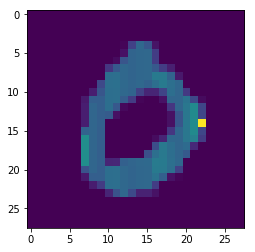

In [9]:
plt.imshow(x_test[3])
plt.show()

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  785000    
_________________________________________________________________
dense_1 (Dense)              multiple                  1001000   
_________________________________________________________________
dense_2 (Dense)              multiple                  10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
